In [18]:
import pandas as pd
from pandas import Series, DataFrame

# # numpy, matplotlib,seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [19]:
data = pd.read_csv('/Users/aishwaryachinnari/Downloads/sf-salaries/Salaries.csv')

In [20]:
data.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


In [21]:
data.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [22]:
type(data)

pandas.core.frame.DataFrame

In [23]:
data.shape

(148654, 13)

In [24]:
data.columns.tolist()

['Id',
 'EmployeeName',
 'JobTitle',
 'BasePay',
 'OvertimePay',
 'OtherPay',
 'Benefits',
 'TotalPay',
 'TotalPayBenefits',
 'Year',
 'Notes',
 'Agency',
 'Status']

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [26]:
data.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [27]:
data.groupby(['Agency','Year'])[['TotalPay']].mean()

TotalPay
Agency        Year              
San Francisco 2011  71744.103871
              2012  74113.262265
              2013  77611.443142
              2014  75463.918140

(array([ 23958.,  10102.,   7967.,  16308.,  21113.,  17547.,  13837.,
         10371.,   9073.,   6406.,   4360.,   3066.,   2108.,   1137.,
           585.,    318.,    154.,     82.,     59.,     41.]),
 array([      0.,   15000.,   30000.,   45000.,   60000.,   75000.,
          90000.,  105000.,  120000.,  135000.,  150000.,  165000.,
         180000.,  195000.,  210000.,  225000.,  240000.,  255000.,
         270000.,  285000.,  300000.]),
 <a list of 20 Patch objects>)

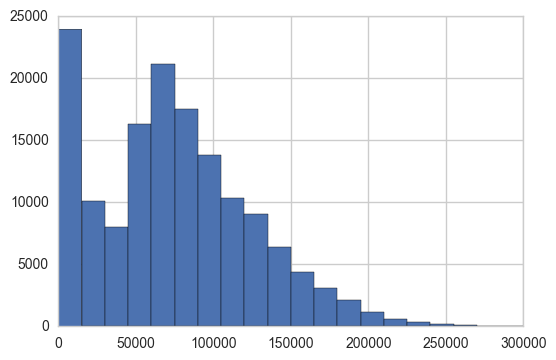

In [28]:
plt.hist(data['TotalPay'], bins=20, range=[0, 300000])

In [29]:
data = data.drop(["Id", "Notes", "Status", "Agency"], axis = 1)
data = data.dropna()
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
36159,Gary Altenberg,"Lieutenant, Fire Suppression",128809,220909,13126.3,44430.1,362844.66,407274.78,2012
36160,Gregory Suhr,Chief of Police,302578,0,18974.1,69810.2,321552.11,391362.30,2012
36161,Khoa Trinh,Electronic Maintenance Tech,111921,146415,78057.4,53102.3,336393.73,389496.02,2012
36162,Joanne Hayes-White,"Chief, Fire Department",296943,0,17816.6,72047.9,314759.60,386807.48,2012
36163,Frederick Binkley,EMT/Paramedic/Firefighter,126863,192424,17917.2,44438.2,337204.86,381643.11,2012


In [30]:
columns = ["BasePay", "OvertimePay", "OtherPay", "Benefits", "TotalPay", "TotalPayBenefits"]
columns

['BasePay',
 'OvertimePay',
 'OtherPay',
 'Benefits',
 'TotalPay',
 'TotalPayBenefits']

In [31]:
data = data[data.BasePay != "Not Provided"]
data[columns] =data[columns].astype(np.float32)
data[columns].head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
36159,128808.867188,220909.484375,13126.309570,44430.121094,362844.65625,407274.78125
36160,302578.000000,0.000000,18974.109375,69810.187500,321552.12500,391362.31250
36161,111921.000000,146415.312500,78057.406250,53102.289062,336393.71875,389496.03125
36162,296943.000000,0.000000,17816.589844,72047.882812,314759.59375,386807.46875
36163,126863.187500,192424.484375,17917.179688,44438.250000,337204.87500,381643.12500


In [32]:
data = data[data.BasePay >= 0]
data = data[data.OvertimePay >= 0]
data = data[data.OtherPay >= 0]

data["SumedTotal"] = data["BasePay"] + data["OvertimePay"] + data["OtherPay"]
data["SumedBenefits"] = data["TotalPay"] + data["Benefits"]

data = data[data.SumedTotal == data.TotalPay]
data = data[data.SumedBenefits == data.TotalPayBenefits]

data = data.drop(["SumedTotal", "SumedBenefits"], axis = 1)

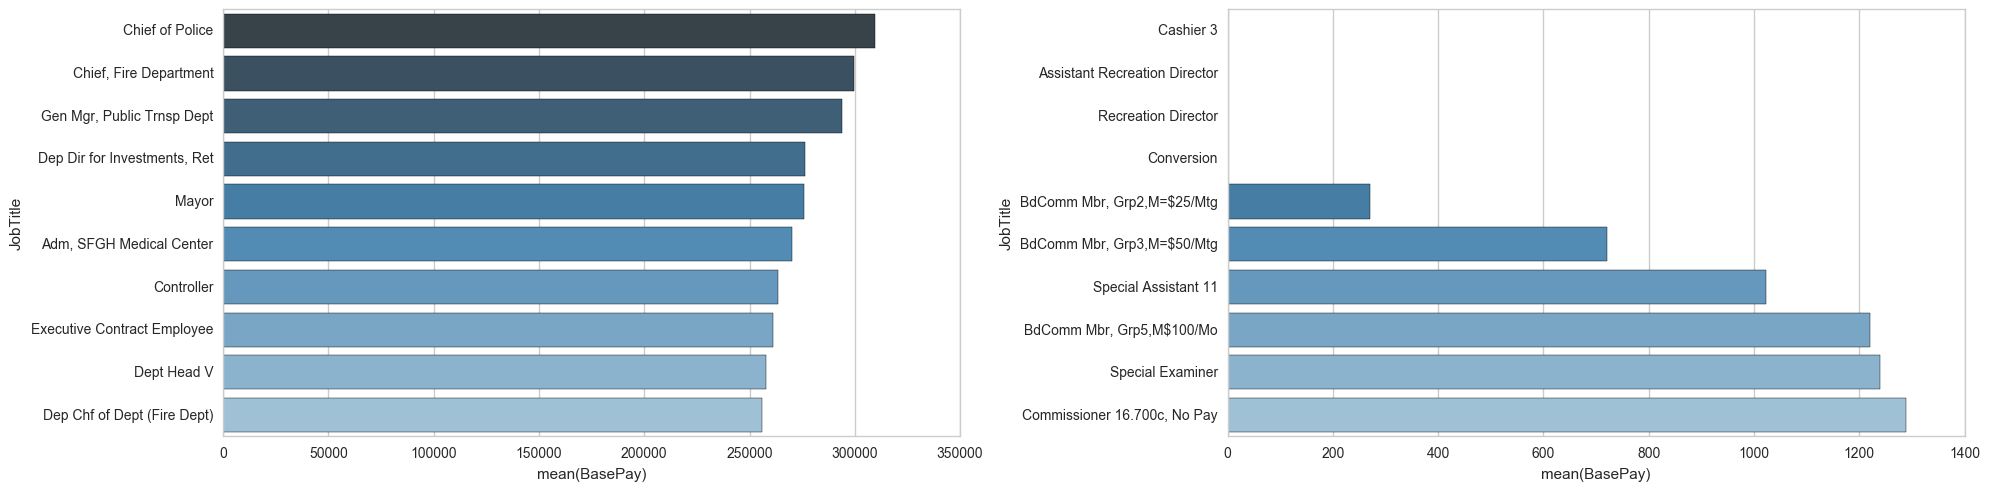

In [40]:
df_Job = data[columns + ["JobTitle"]].groupby(by = ["JobTitle"], as_index = False)
df_Job = df_Job.mean()


fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,5))



sns.barplot(x = "BasePay", y = "JobTitle", data = df_Job.sort_values(by = "BasePay", ascending = False).head(10), 
            palette="Blues_d", ax = axis1)
sns.barplot(x = "BasePay", y = "JobTitle", data = df_Job.sort_values(by = "BasePay").head(10), palette="Blues_d", 
            ax = axis2)

fig.tight_layout()

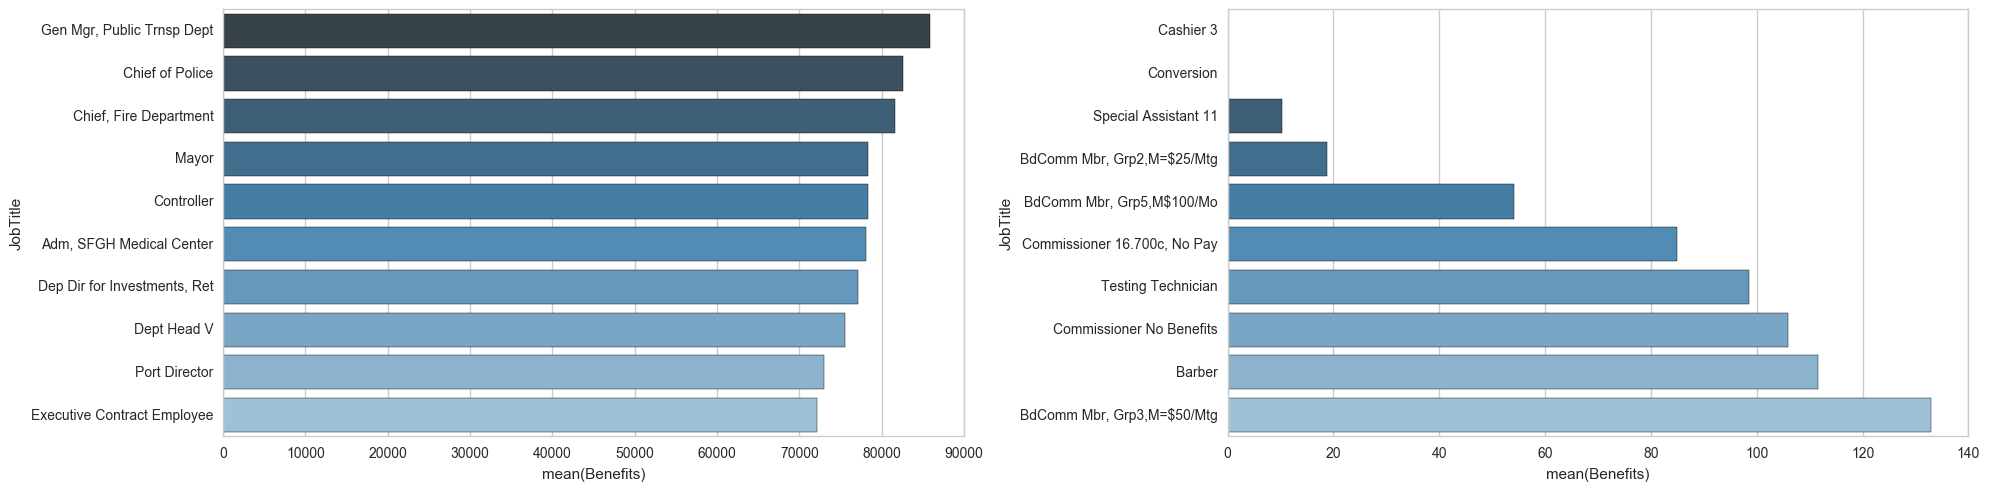

In [41]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,5))

# 1] 10 job profile with highest Benefits
# 2] 10 job profile with lowest Benefits
sns.barplot(x = "Benefits", y = "JobTitle", data = df_Job.sort_values(by = "Benefits", ascending = False).head(10), palette="Blues_d", ax = axis1)
sns.barplot(x = "Benefits", y = "JobTitle", data = df_Job.sort_values(by = "Benefits").head(10), palette="Blues_d", ax = axis2)

fig.tight_layout()

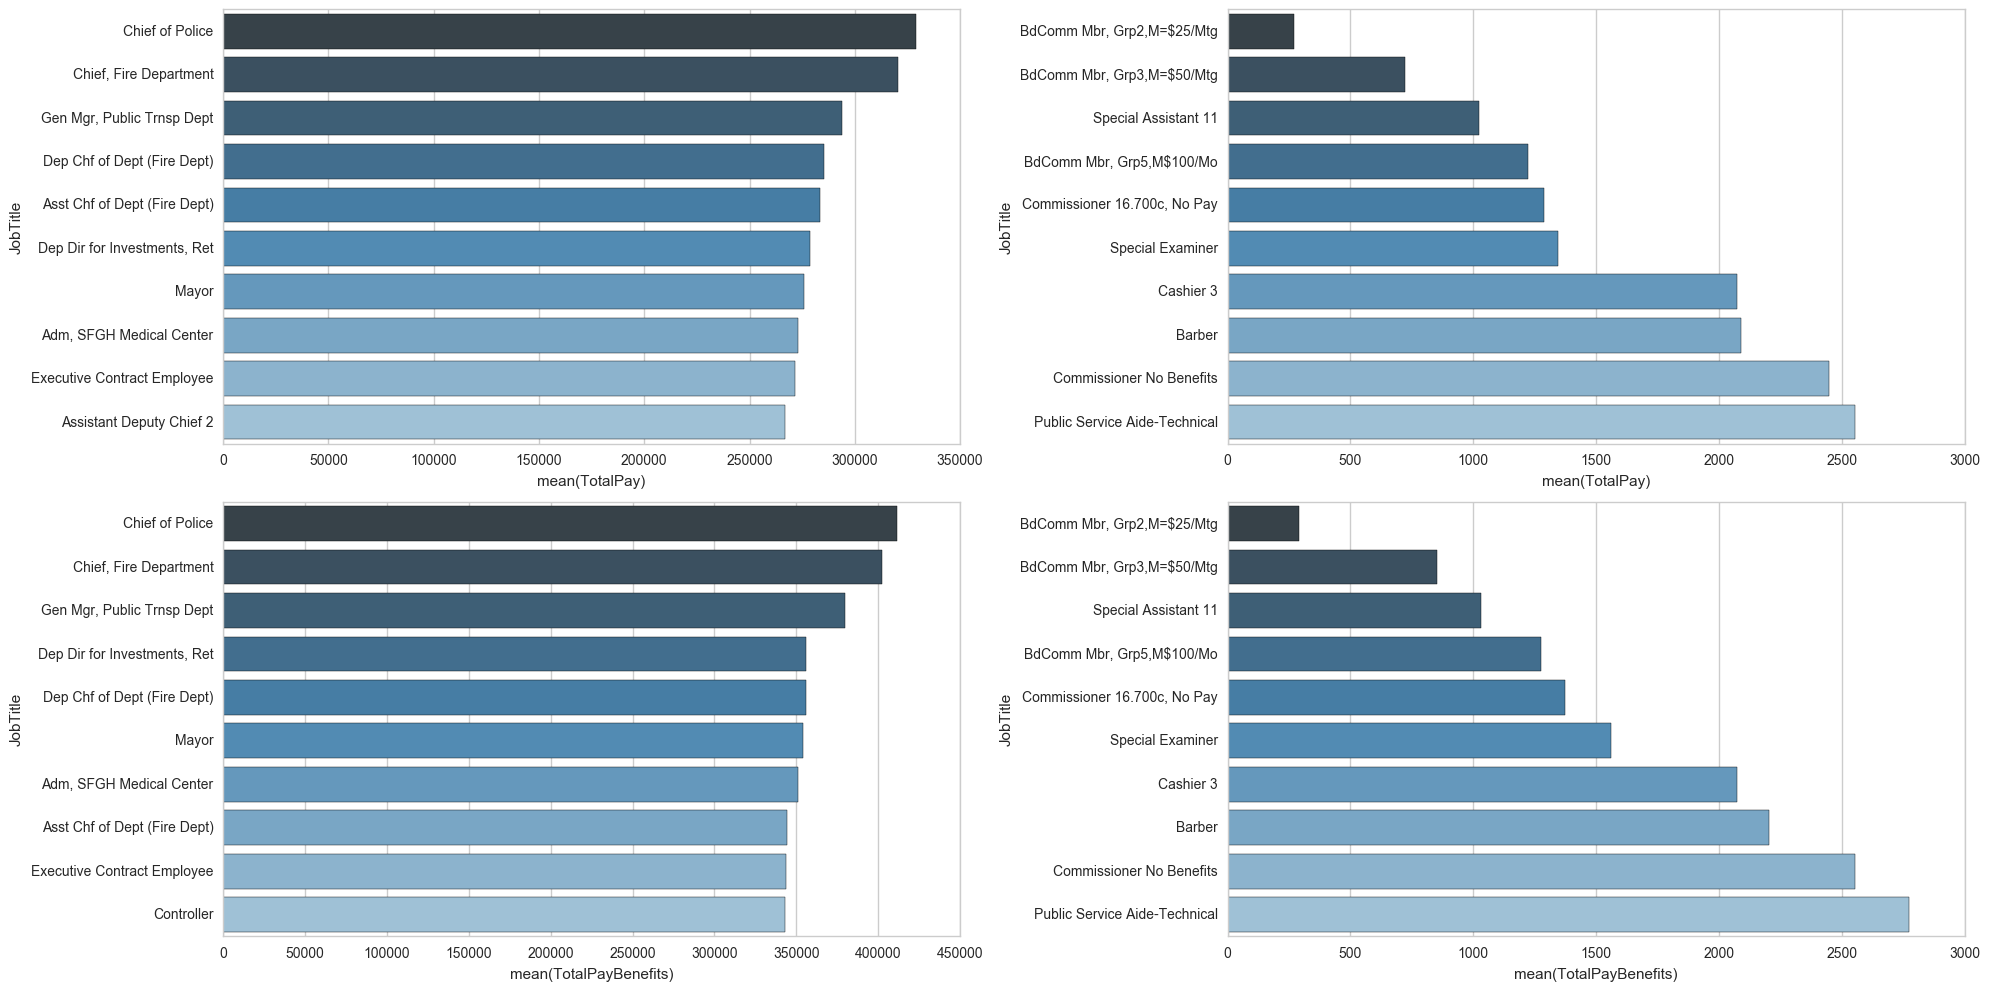

In [42]:
fig, ((axis1,axis2), (axis3,axis4)) = plt.subplots(2,2,figsize=(20,10))

# 1] 10 job profile with highest TotalPay and TotalPayBenefits
# 2] 10 job profile with lowest TotalPay and TotalPayBenefits
sns.barplot(x = "TotalPay", y = "JobTitle", data = df_Job.sort_values(by = "TotalPay", ascending = False).head(10), palette="Blues_d", ax = axis1)
sns.barplot(x = "TotalPay", y = "JobTitle", data = df_Job.sort_values(by = "TotalPay").head(10), palette="Blues_d", ax = axis2)

sns.barplot(x = "TotalPayBenefits", y = "JobTitle", data = df_Job.sort_values(by = "TotalPayBenefits", ascending = False).head(10), palette="Blues_d", ax = axis3)
sns.barplot(x = "TotalPayBenefits", y = "JobTitle", data = df_Job.sort_values(by = "TotalPayBenefits").head(10), palette="Blues_d", ax = axis4)

fig.tight_layout()

In [46]:
df_Year = data.groupby(by = "Year", as_index = False).mean()
df_Year

,Year,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
0,2012,64652.539062,4378.500488,3366.542480,26109.751953,72397.578125,98507.335938
1,2013,68675.554688,4595.354980,3370.652100,23643.384766,76641.562500,100284.945312
2,2014,65821.632812,4668.479980,3073.784424,24366.240234,73563.898438,97930.140625


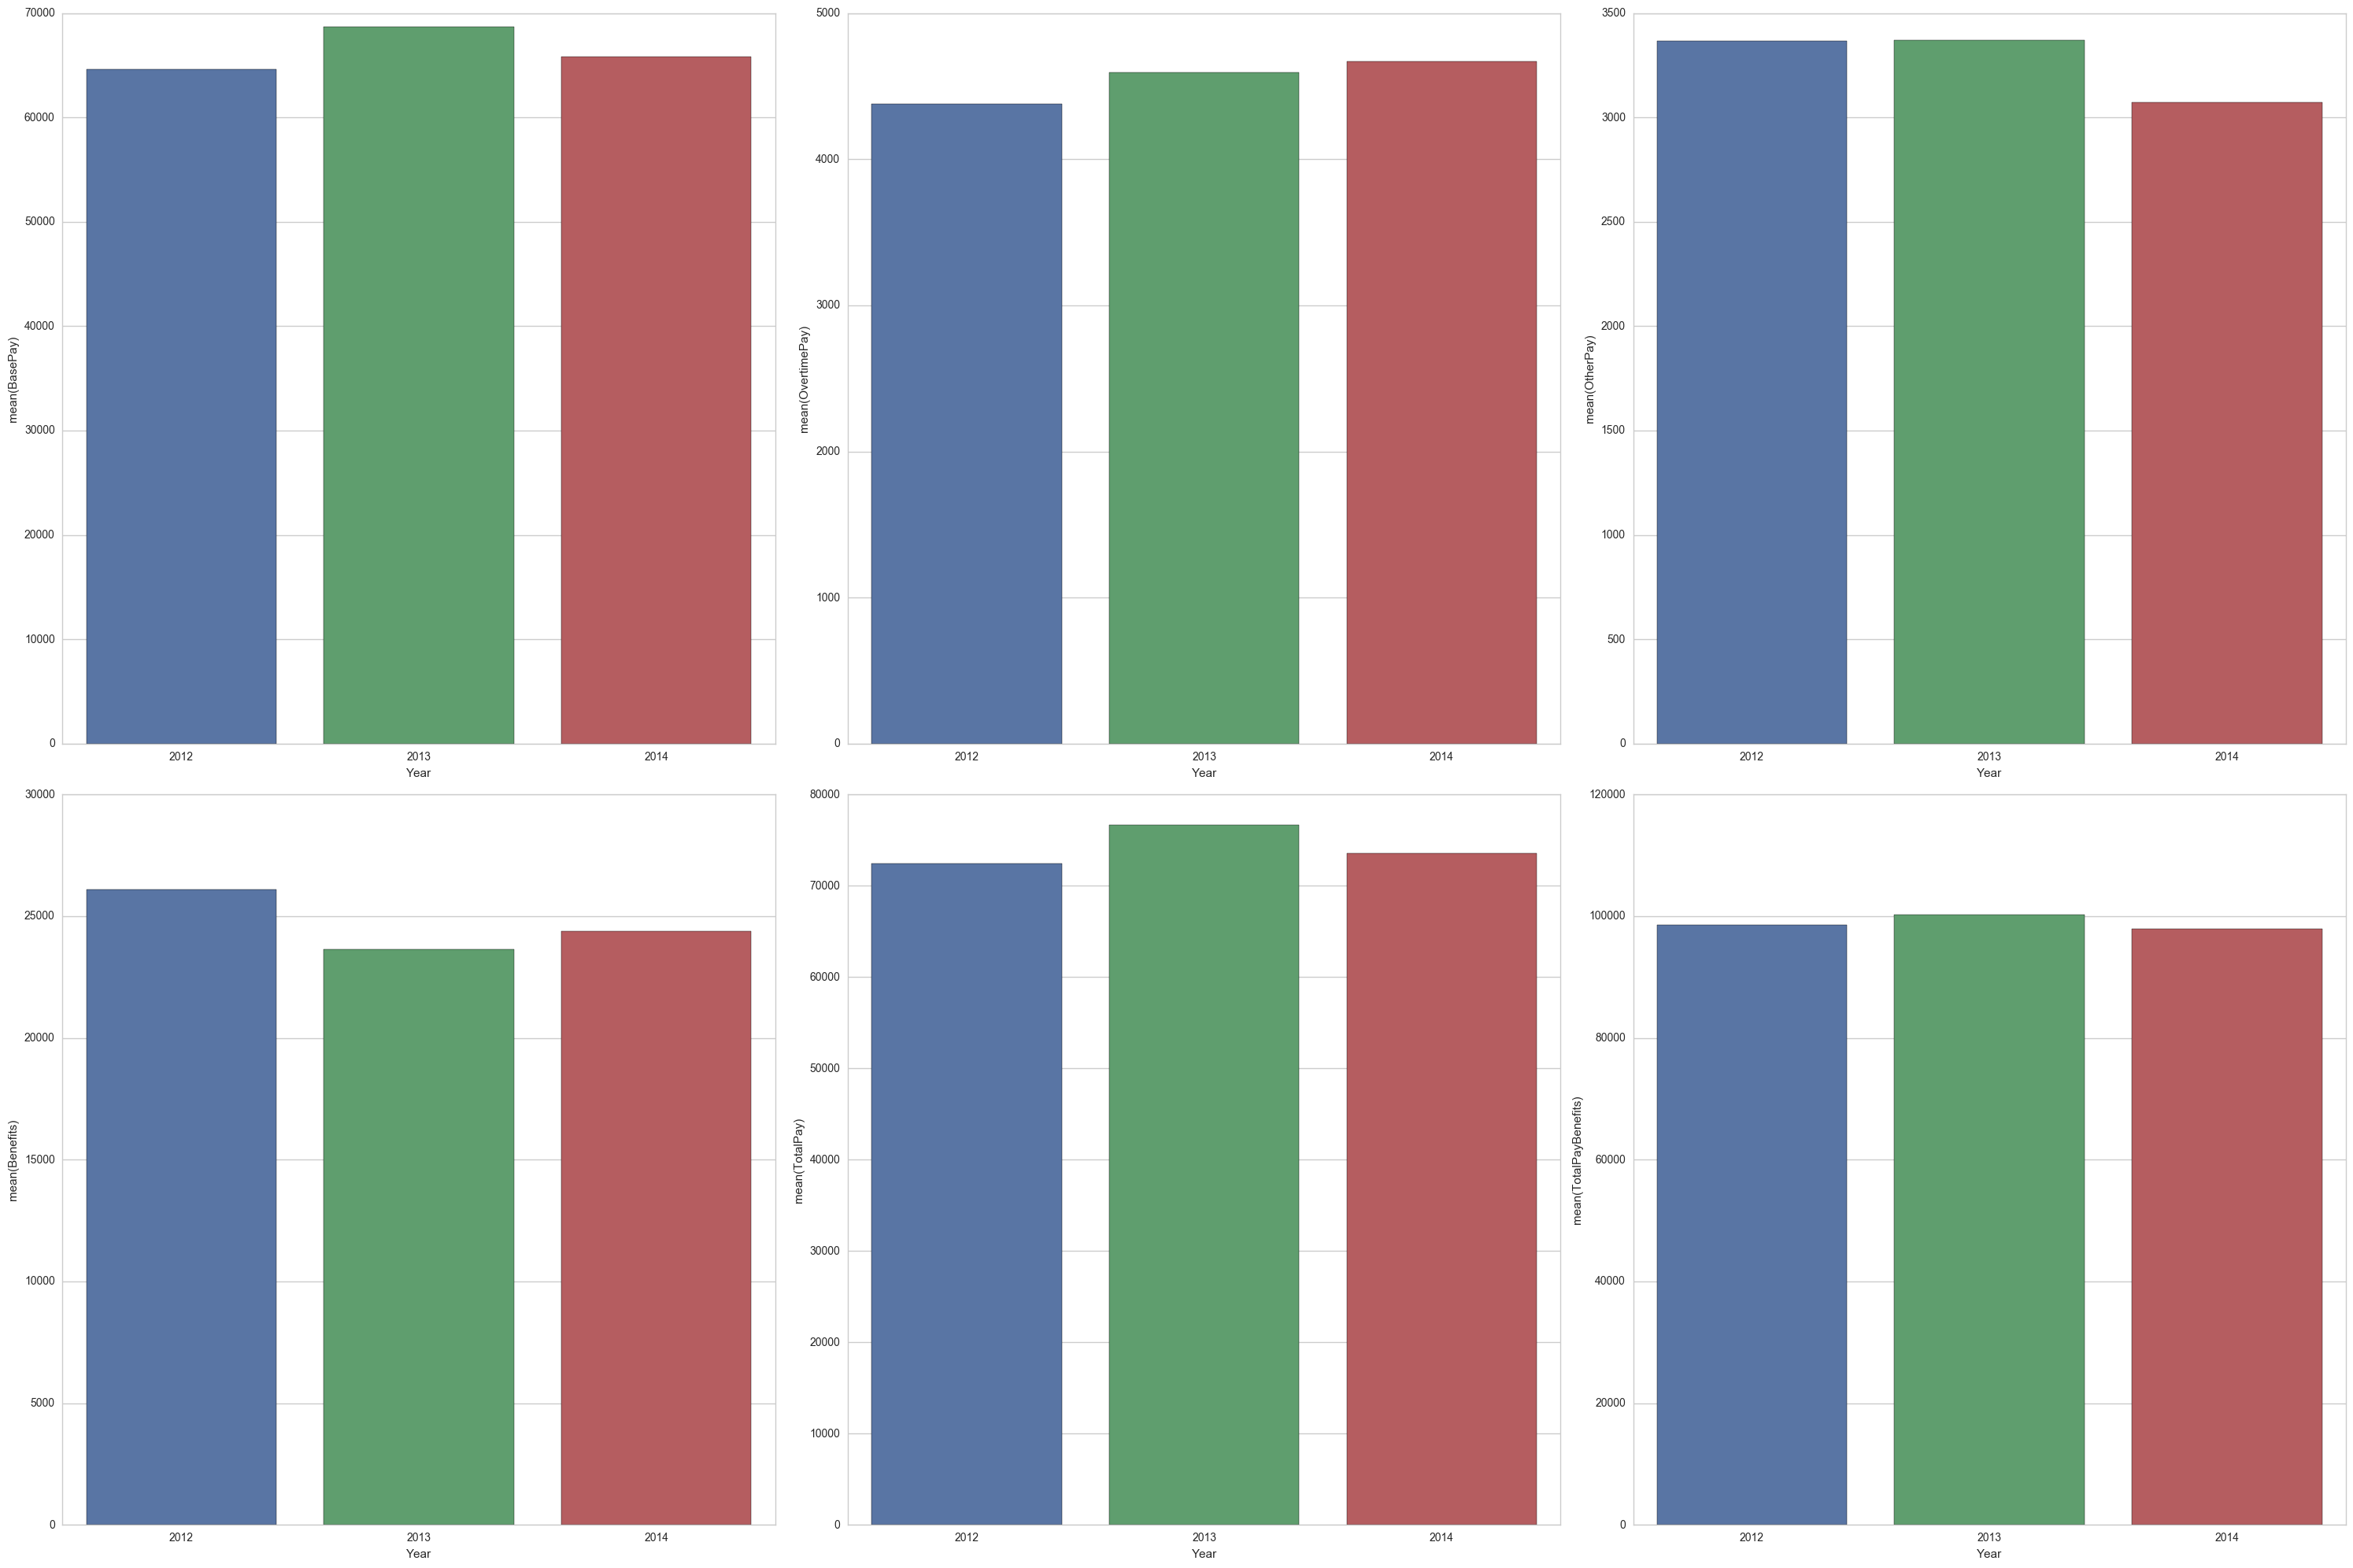

In [48]:
fig, ((axis1, axis2, axis3), (axis4, axis5, axis6)) = plt.subplots(2,3,figsize=(30,20))

# All six pay year wise
sns.barplot(x = "Year", y = "BasePay", data = df_Year, ax = axis1)
sns.barplot(x = "Year", y = "OvertimePay", data = df_Year, ax = axis2)
sns.barplot(x = "Year", y = "OtherPay", data = df_Year, ax = axis3)

sns.barplot(x = "Year", y = "Benefits", data = df_Year, ax = axis4)
sns.barplot(x = "Year", y = "TotalPay", data = df_Year, ax = axis5)
sns.barplot(x = "Year", y = "TotalPayBenefits", data = df_Year, ax = axis6)

fig.tight_layout()

# Overtime pay => 2012 < 2013 < 2014
# but intrestingly TotalPayBenifit remains almost equal throughout 2012,2013 and 2014

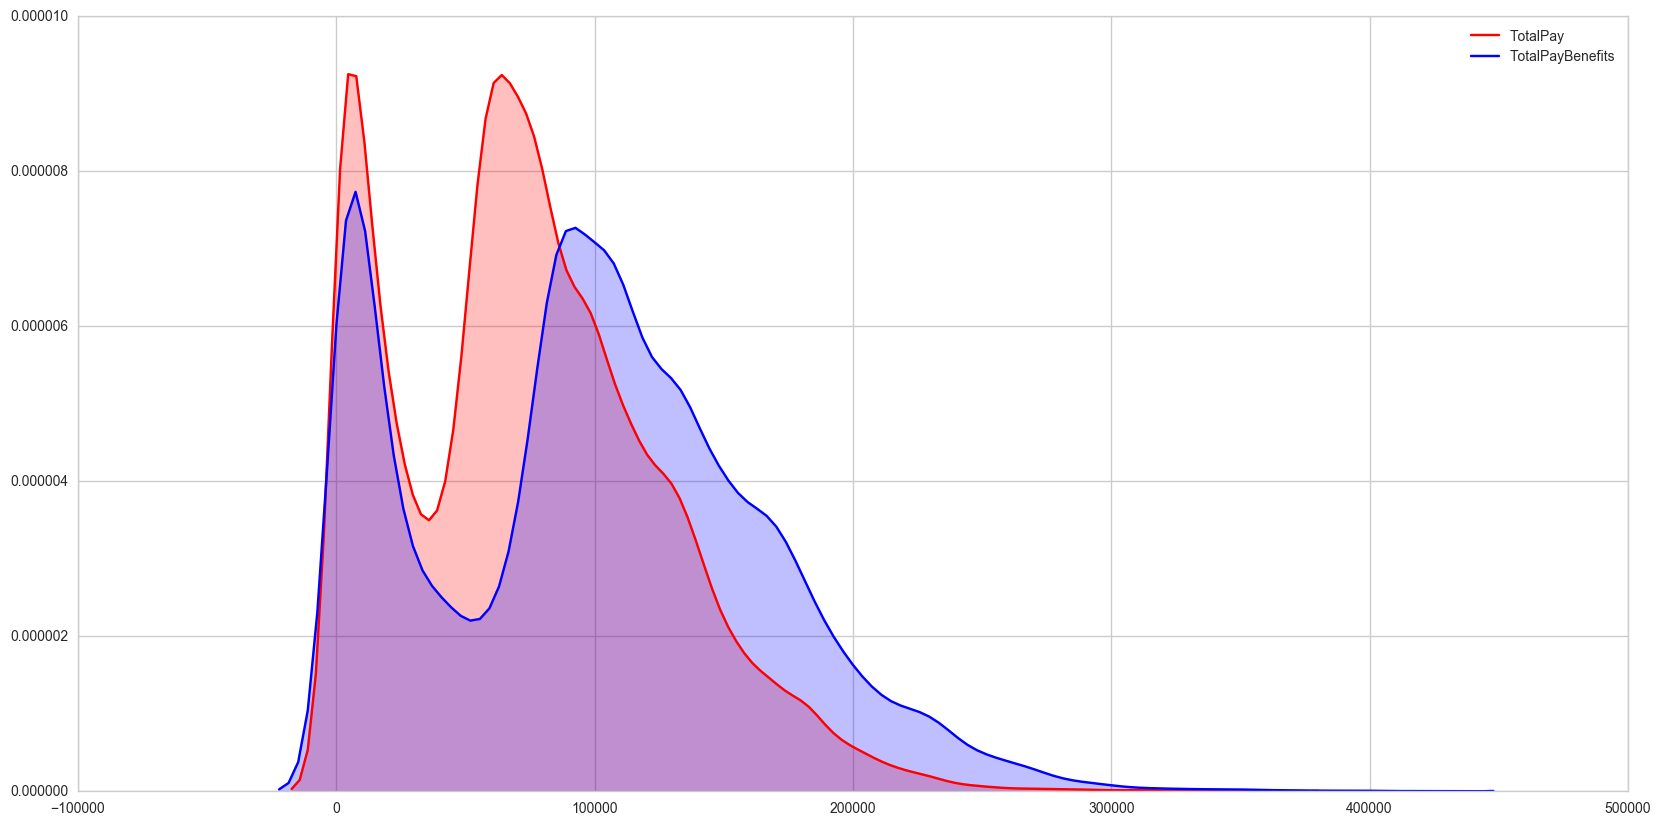

In [49]:
# Distribution of TotalPay of people
fig, (axis1) = plt.subplots(1, 1, figsize=(20,10))

sns.kdeplot(data["TotalPay"], shade=True, color="r", ax = axis1)
sns.kdeplot(data["TotalPayBenefits"], shade=True, color="b", ax = axis1)